# <font color="blue"> Classification and Regression</font>

Adam Hereth


Building and comparing three classifiers applied on South African Heart Disease dataset from the book: ["Elements of Statistical Learning"](https://web.stanford.edu/~hastie/ElemStatLearn/) by T. Hastie, R. Tibshirani, and J. Friedman.

According to [ReportLinker](https://www.reportlinker.com/p05251483/Global-AI-in-Healthcare-Market-Report-for.html), "spending on this category is forecasted to jump from \\$2.1 billion to \\$36.1 billion by 2025. This is a 50.2% Compound Annual Growth Rate (CAGR)."

This assignment help with having a:
- better understand classification and regression.

- getting started with scikit-learn and its built-in methods, as well as implemented classification and regression models.

- practice data preprocessing.

- practice model evaluation using performance metrics and cross validation.

- learn how to plot ROC curves.

## Part I - Classification

You are going to build three classifiers from sklearn to predict heart disease. First, download [the data](https://github.com/fereydoonvafaei/CMSC471-Spring2020/blob/master/Assignment-4/SAheart.csv) and save it in your working directory. Also, import necessary Python and sklearn modules.

In [ ]:
# Import necessary modules
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

url = 'https://raw.githubusercontent.com/fereydoonvafaei/CMSC471-Spring2020/master/Assignment-4/SAheart.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

## <font color="red"> Required Coding

> Next, load the data with pandas. The data (csv file) should be stored in the same working directory as your notebook.

In [ ]:
heart_data = df1

In [ ]:
print(heart_data.shape)
heart_data.head()

(462, 11)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Some description about the features from the data source:

> "A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal." 

        sbp	        systolic blood pressure
        tobacco		cumulative tobacco (kg)
        ldl		    low densiity lipoprotein cholesterol
        adiposity
        famhist		family history of heart disease (Present, Absent)
        typea		  type-A behavior
        obesity
        alcohol		current alcohol consumption
        age		    age at onset
        chd		    label, coronary heart disease


In [ ]:
# The first column, row.names is useless for this ML task, drop it!

heart_data.drop('row.names', axis=1, inplace=True)
print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
# Get the feature data types.
heart_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

> Next, you need to convert `famhist` from categorical (Present/Absent) to numerical {0,1} for further processing in classifier.

In [ ]:
 # Convert 'famhist' to pd.Categorical and then use .cat.codes to convert the values to [0,1] ~2 lines
# Hint: There might be other ways to do this using pandas dataframe methods.
# Make sure your output looks exactly like the dataframe head below, i.e. famhist values are converted to {0,1}.
...
heart_data.famhist.replace(('Present', 'Absent'), (0,1), inplace=True)
print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [ ]:
type(heart_data['famhist'][0])

numpy.int64

In [ ]:
# Create X, y 
# Notice that X should contain all the features (columns) except 'chd'
# y should only include 'chd' because it's the target label!
X = heart_data.drop(columns = ['chd'])
y = heart_data['chd']

print(X.shape)
print(y.shape)

(462, 9)
(462,)


> Next, split the data with a test size of 0.33

In [ ]:
# Split the data to train and test using train_test_split method with test_size=0.33
...
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(309, 9)
(309,)
(153, 9)
(153,)


> Next, build the classifiers.


> **Required mean cv score**: You should get at least **0.75 mean cv score** for all three classifiers (0.75 would be the rounded value with two decimal points). You may begin with the default hyperparameter values; however, you should fine-tune them accordingly to satisfy the minimum mean cv score requirement.


> You may check out scikit-learn documentations to see what hyperparameters are available for each classifier: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [Linear SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

> **Note:** Whenever you perform cross validation, you apply the method on the whole X, whereas when you use `.fit()` method, you apply it on X_train only.

In [ ]:
# Create a LogisticRegression with a 'liblinear' solver
logreg_clf = LogisticRegression(random_state=1, solver='liblinear', multi_class="auto", n_jobs=1, C=1)

# Perform a 10-fold cross validation with scoring='roc_auc'
# Hint: cross validation should be done on the whole X
logreg_cv_score = cross_val_score(logreg_clf, X, y, cv=10, scoring='roc_auc')

print("Mean CV Score - Logistic Regression: ", logreg_cv_score.mean())

Mean CV Score - Logistic Regression:  0.7650604838709677


In [ ]:
# Create a Linear SVM Classifier using LinearSVC()
svm_clf = LinearSVC(tol=1e-05, random_state=10)

# Perform a 10-fold cross validation with scoring='roc_auc'
svm_cv_score = cross_val_score(svm_clf, X, y, cv=10, scoring='roc_auc')

print("Mean CV Score - Linear SVM: ", svm_cv_score.mean())

Mean CV Score - Linear SVM:  0.7547916666666666


In [ ]:
# Create a RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 2, random_state=2)

# Perform a 10-fold cross validation with scoring 'roc_auc'
rf_cv_score = cross_val_score(rf_clf, X, y, cv=10, scoring='roc_auc')

print("Mean CV Score - Random Forest: ", rf_cv_score.mean())

Mean CV Score - Random Forest:  0.7515288978494624


> Next, you're going to fine-tune your rf classifier solely based on `n_estimators` hyperparameter. Depending on your computer speed, this may take a few minutes. Follow the comments in the following cell carefully, and plot the impact of n_estimators on mean cv scores. You're going to perform 10-fold cross validation. cv `scoring` will still be `roc_auc`. **Incomplete plots will get ZERO credit!**

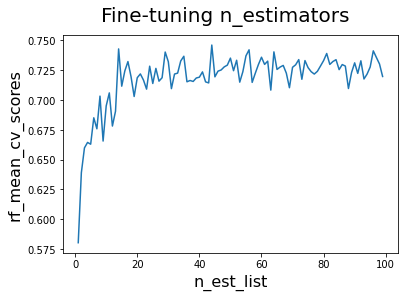

In [ ]:
# Now fine-tune n_estimators hyperparameter as follows:

# 1- Write a for loop that iterates over n_estimators from 1 to 100
# 2- In each iteration, do 10-fold cv and calculate rf_cv_score.mean()
# and append it to the list rf_mean_cv_scores
# 3- Finally, plot rf_mean_cv_scores on y-axis versus n_est_list on x-axis
# Your plot should have the title "Fine-tuning n_estimators", and proper label for each axis
rf_mean_cv_scores = []
n_est_list = []
for i in range(1,100):
  rf_clf = RandomForestClassifier(n_estimators = i)
  rf_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring='roc_auc')
  x = rf_cv_score.mean()
  rf_mean_cv_scores.append(x)
  n_est_list.append(i)
x = n_est_list
y = rf_mean_cv_scores
plt.plot(x,y)
plt.suptitle('Fine-tuning n_estimators', fontsize=20)
plt.xlabel('n_est_list', fontsize=16)
plt.ylabel('rf_mean_cv_scores', fontsize=16)
plt.show()



# Incomplete plots will get ZERO credit!
# Running this cell may take a few minutes.


In [ ]:
# Fit the rf_clf on the training set
...
rf_clf.fit(X_train,y_train)
# Get feature_importances of rf for all features
for name, score in zip(heart_data, rf_clf.feature_importances_):
    print(name, score)

sbp 0.08858403986360273
tobacco 0.16724189307207607
ldl 0.10974453513853046
adiposity 0.11885347298640432
famhist 0.04742364084978827
typea 0.10213208009256357
obesity 0.10939351496992518
alcohol 0.08579235317340463
age 0.17083446985370482


The provided code in the following cells show how you can plot ROC curve using fpr, tpr, and threshold returned by `metrics.roc_curve` and class probabilities using `predict_proba()` method. Notice that some classifiers don't have `predict_proba()`, and in that case you can use `decision_function()` method to get the scores.

In [ ]:
# Get class probabilities, fpr, tpr and threshold for random forest.
rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

Text(0.5, 0, 'False Positive Rate')

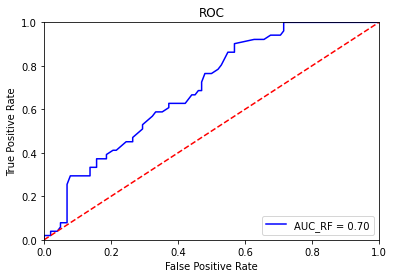

In [ ]:
# Plot ROC curve.
plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

> Now, Plot ROC for all three classifiers in ONE plot with different colors, and with AUC scores shown on the `'lower right'` of the plot for each classifier.

## <font color="red"> Required Coding

In [ ]:
# Fit the svm_clf and logreg_clf on the training set
...
svm_clf.fit(X_train,y_train)
print(svm_clf)
logreg_clf.fit(X_train,y_train)
print(logreg_clf)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=10, tol=1e-05,
          verbose=0)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


Ellipsis

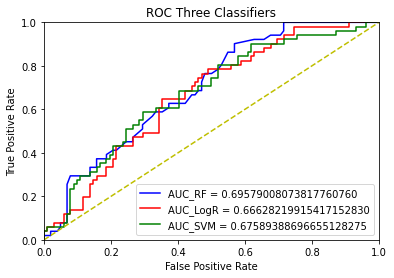

In [ ]:
# Plot ROC for all three classifiers with different colors in one plot,
# and with AUC scores shown on the 'lower right' of the plot.

# Plot should have title and axis lables.

# Write as many number of lines of code as needed.


logreg_probs = logreg_clf.predict_proba(X_test)
logreg_preds = logreg_probs[:,1]
logreg_fpr, logreg_tpr, logreg_threshold = metrics.roc_curve(y_test, logreg_preds)
logreg_roc_auc = metrics.auc(logreg_fpr, logreg_tpr)

svm_probs = svm_clf.decision_function(X_test)
svm_preds = svm_probs[:]
svm_fpr, svm_tpr, svm_threshold = metrics.roc_curve(y_test, svm_preds)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

plt.title('ROC Three Classifiers')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.20f' % rf_roc_auc)
plt.plot(logreg_fpr, logreg_tpr, 'r', label = 'AUC_LogR = %0.20f' % logreg_roc_auc)
plt.plot(svm_fpr, svm_tpr, 'g', label = 'AUC_SVM = %0.20f' % svm_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Hint1: You may use the code for random forest ROC curve,
# and use different names for different variables of each classifier.

# Hint2: LinearSVC doesn't have predict_proba() method,
# instead, you should directly use decision_function() method to compute svm_preds

...

## Part I Questions

Answer the following questions HERE:

**Q1 (5 points)** - Which classifier has a better performace according to ROC curves above? Which one is the 2nd best according to ROC plot?
AUC_LogR has the best performance
AUC_SVM is 2nd best


**Q2 (5 points)** - What is the most important feature of this dataset for the random forest classifier? <b>Hint:</b> Check back the previous cells where you get them!
Age is the most important because it has the highest percentage. 0.16

**Q3 (5 points)** - According to the fine-tuning plot of `n_estimators`, what is an appropriate range for `n_estimators`. You should GIVE A COMPLETE ANSWER based on your plot results, and make reasonable arguments. Incomplete answers will get ZERO credit! An appropriate range would be 40-60. Since after 60 is does become more accurate by 1% or so. Adding more estimators will make it more accurate however it will be slower to run. As well as the peaks and valleys are not too far apart. 

## Part II - Regression

In this part, you review some of the concepts discussed in regression.

First, solve the following regression problem using closed form solution (normal equation). 

You're going to generate some data and then use closed-form solution for linear regression to fit the data.

Generate data points based on the following linear equation added by [the noise with “standard normal” distribution](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html). You may refer to the slides/textbook code snippets.

$$y = 5 + 6X + Gaussian Noise$$

## <font color="red"> Required Coding

In [ ]:
import numpy as np
X = 2 * np.random.rand(100, 1)
mu, sigma = 0, 0.1
GNoise = sigma * np.random.randn() + mu
# Compute y based on the linear equation given above and add random gaussian noise
y = 5 + 6*X + GNoise

print(X[0])
print(y[0])

[1.68236544]
[15.12748972]


(0.0, 2.2, 0.0, 18.0)

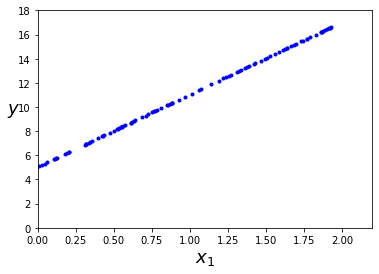

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2.2, 0, 18])

In [ ]:
# add x0 = 1 to each instance using np.c_
X_b = np.c_[np.ones((100,1)), X]

# Compute theta_best using normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[5.0332971],
       [6.       ]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [ ]:
# Make predictions on new data by computing the dot product of X_new_b and theta_best
y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 5.0332971],
       [17.0332971]])

(0.0, 2.2, 0.0, 18.0)

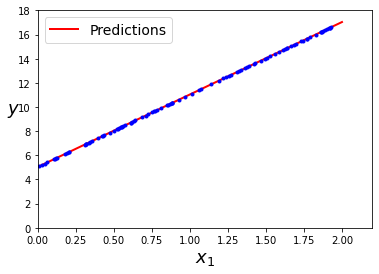

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2.2, 0, 18])

> Next, run the cell below. Then answer the following questions.

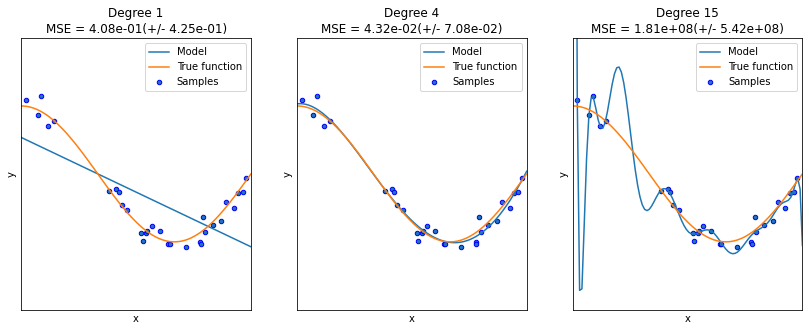

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
                             #scoring="explained_variance", cv=10)
                             #scoring="neg_root_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()